# Week 7 Assignment

This week we are collecting some data from Reddit and doing some basic EDA on it. You should:

- create your Reddit account and API keys
- collect data from a subreddit of your choice
    - at a minimum, collect the posts from the subreddit; optionally collect comments on the posts
- save the data to a SQLite3 database
- perform some basic EDA on the data
    - create at least 2 plots
- write a short analysis at the end describing the process and results
- turn in the Jupyter Notebook and PDF printout or export to the week 7 dropbox

***Optional* advanced section**
- Practice SQL queries and select a subsection of the posts you collected
- Modify your code to collect data beyond the 1000 item limit
- Collect comments from the posts for analysis next week and do some EDA on the comments (e.g. who is the top commenter, which commenters have the most up and down votes or most controversial posts, etc)
- examine n-grams ([bigrams](https://stackoverflow.com/a/37651184/4549682), trigrams) or [collocations](https://www.geeksforgeeks.org/nlp-word-collocations/)

Note: There is no solution file for this week.

# Collecting data from Reddit:

We are collecting social media data from Reddit.An online discussion board founded in 2005 that allows people to post anything and receive comments. Python wrapper for reddit(PRAW) is uses reddit API to  extract data from the reddit. So, we need create the reddit account and  get the API credentials for the account to access data using PRAW. 

The acquired credentials are stored in credentials.py in the same directory and Fill in the variables in that file with your API credentials before loading it.

In [31]:
#!pip install praw



Installing all the required libraries using import comman.d

In [32]:
import praw
import matplotlib.pyplot as plt
import credentials
import pandas as pd
import sqlite3

We can connect  reddit account with our credentials. We just connect our credentails by importing credentials pyhton file.

In [33]:
reddit = praw.Reddit(client_id=credentials.client_id,
                     client_secret=credentials.client_secret,
                     user_agent=credentials.user_agent)

Here, we are choosing 'science' subreddit to collect data and analysing data. It returns the generator object with all the data from 'science' subreddit. 

In [34]:
sci_subreddit = reddit.subreddit('science').hot(limit=6)

In [35]:
sci_subreddit

title and score are the attributes of every post in subreddit. Title gives the title name of the post and score gives the score of that post. Similarly, for every post has many attributes which gives information of the post.

In [36]:
for post in sci_subreddit :
    print(post.title, post.score)
        

Artificially sweetened drinks linked to increased risk of irregular heartbeat by up to 20% 1785
A 62-year-old male from Germany claims to have received 217 COVID-19 vaccines, of which there is official evidence for 134. A new study of his immune cells suggests they are functioning normally. 3431
Adherence to traditional gender roles is associated with a decrease in sexual desire but an increase in frequency of sexual activities. This paradox suggests that traditional gender roles may compel individuals to prioritize the fulfillment of perceived sexual duties over their own sexual desires. 3964
Vape use significantly impacts the sleep quality and anxiety levels of young adults (18-25Y) 723
Overall speed of speech, rather than the struggle to find words, serves as a more telling indicator of cognitive health. This discovery suggests that slowing down in speech could signal changes in the brain, while difficulties in word retrieval might be a normal aspect of aging. 1648
An Australian stu

In [37]:
list(sci_subreddit)

[]

In [38]:
sci_subreddit

post.num_comments gives the number of comments for that post. 

In [39]:
post.num_comments

117

We can get the direct link for accesing  post in reddit by post.permalink . It directly allows to get into the post. 

In [40]:
post.permalink

'/r/science/comments/1b7ewak/an_australian_study_has_found_that_a_very_low/'

score (something like the upvotes minus downvotes), which mainly measures the interests of the users on that post. "Post.score" is used to get the score for that post. 

In [41]:
post.score

304

We are interested in title, link, Author, num_comments and score of the 'science' subreddit. We extract the all post data by changing limit= None and storing them as dictionary of lists with keys as interested data.

In [42]:
reddit_data = {k:[] for k in ['title','link','author','num_comments','score']}

sci_subreddit = reddit.subreddit('science').hot(limit=None)

for post in list(sci_subreddit):
    reddit_data['title'].append(post.title)
    reddit_data['link'].append(post.permalink)
    if post.author is None:
        reddit_data['author'].append('')
    else:
        reddit_data['author'].append(post.author.name)
    
    reddit_data['num_comments'].append(post.num_comments)
    reddit_data['score'].append(post.score)

pandas's DataFrame method allows to convert our data into DataFrame. 

In [43]:
sci_df = pd.DataFrame(reddit_data)

In [44]:
sci_df

,title,link,author,num_comments,score
0,Artificially sweetened drinks linked to increa...,/r/science/comments/1b7fqsk/artificially_sweet...,elizabeth-cooper,199,1782
1,A 62-year-old male from Germany claims to have...,/r/science/comments/1b73anb/a_62yearold_male_f...,molrose96,302,3433
2,Adherence to traditional gender roles is assoc...,/r/science/comments/1b72e2w/adherence_to_tradi...,mvea,341,3965
3,Vape use significantly impacts the sleep quali...,/r/science/comments/1b7av93/vape_use_significa...,giuliomagnifico,100,728
4,"Overall speed of speech, rather than the strug...",/r/science/comments/1b72fdr/overall_speed_of_s...,mvea,64,1648
...,...,...,...,...,...
743,Peale's dolphins (Lagenorhynchus australis) ar...,/r/science/comments/1ahcubx/peales_dolphins_la...,orcinus__orca,1,39
744,Eradicating animals on the basis that they are...,/r/science/comments/1ah0rc3/eradicating_animal...,Wagamaga,53,195
745,The rapid decline of certain Indo-Pacific hump...,/r/science/comments/1ah540b/the_rapid_decline_...,orcinus__orca,2,63
746,The Dangers of Acetaminophen for Neurodevelopm...,/r/science/comments/1ais47e/the_dangers_of_ace...,Future_Class3022,142,0


# Saving data to SQLite3 Database:

We can store our collected in our harddisk using Sqlite3. Sqlite3 is built-in with Python, and saves the data to a file on our hard drive. It's easy to use and set up.

We store the data by providing exact filpath for stoarage of data. We also required to giev more arguments like table(dataframe), connection and other arguments.

In [45]:
connection = sqlite3.connect("sci_subreddit_data.sqlite")
sci_df.to_sql('posts', connection, if_exists='replace', index=False)


748

We can also check that our data can be load with read_sql_query and giving a query to fetch data. It uses our previous connection to connect to data in th disk. 

In [46]:
sci_df_check = pd.read_sql_query('SELECT * FROM posts;', connection)
sci_df_check

,title,link,author,num_comments,score
0,Artificially sweetened drinks linked to increa...,/r/science/comments/1b7fqsk/artificially_sweet...,elizabeth-cooper,199,1782
1,A 62-year-old male from Germany claims to have...,/r/science/comments/1b73anb/a_62yearold_male_f...,molrose96,302,3433
2,Adherence to traditional gender roles is assoc...,/r/science/comments/1b72e2w/adherence_to_tradi...,mvea,341,3965
3,Vape use significantly impacts the sleep quali...,/r/science/comments/1b7av93/vape_use_significa...,giuliomagnifico,100,728
4,"Overall speed of speech, rather than the strug...",/r/science/comments/1b72fdr/overall_speed_of_s...,mvea,64,1648
...,...,...,...,...,...
743,Peale's dolphins (Lagenorhynchus australis) ar...,/r/science/comments/1ahcubx/peales_dolphins_la...,orcinus__orca,1,39
744,Eradicating animals on the basis that they are...,/r/science/comments/1ah0rc3/eradicating_animal...,Wagamaga,53,195
745,The rapid decline of certain Indo-Pacific hump...,/r/science/comments/1ah540b/the_rapid_decline_...,orcinus__orca,2,63
746,The Dangers of Acetaminophen for Neurodevelopm...,/r/science/comments/1ais47e/the_dangers_of_ace...,Future_Class3022,142,0


# EDA on subreddit data:

We have collected and stored subreddit data in our sqlite database. Now, We try to explore the data.  

<Axes: xlabel='author'>

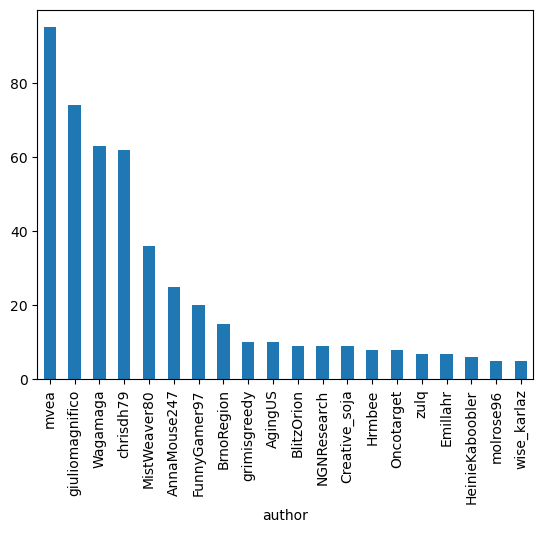

In [47]:
sci_df['author'].value_counts()[:20].plot.bar()

The above plot is bar plot of top 20 authors based on most posts posted in 'science' subreddit data. We observe that 'mvea' posts highest number of posts in science subreedit data.  

<Axes: xlabel='score', ylabel='num_comments'>

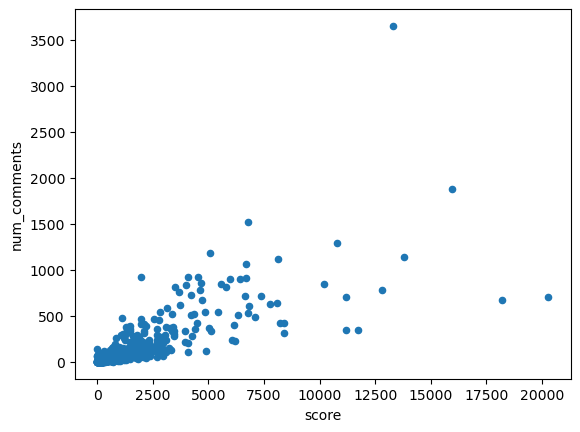

In [48]:
sci_df.plot.scatter(x='score', y='num_comments')

we can see that there is a fairly positive correlation between the score and the quantity of comments. It shows that posts with more likes are used to be more commented by users.

<Axes: ylabel='Frequency'>

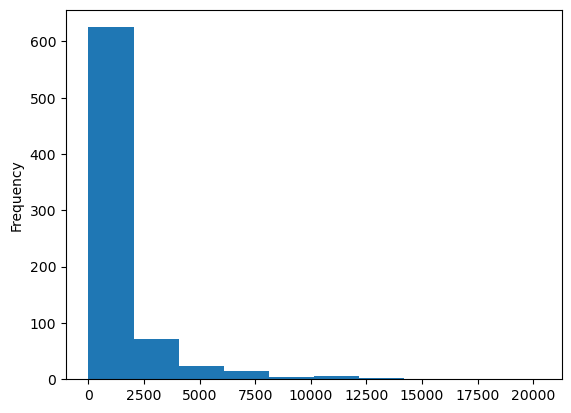

In [49]:
sci_df['score'].plot.hist(bins=10)

The above plot shows the distribution of score of posts in science subreddit.The distribution appears to be rather asymmetrical, with a small number of posts scoring extremely high and many with scores close to 0 .

# Optional Challenge:

In [21]:
sci_subsection_df = pd.read_sql_query('SELECT * FROM posts where score > 100;', connection)
sci_subsection_df

,title,link,author,num_comments,score
0,Adherence to traditional gender roles is assoc...,/r/science/comments/1b72e2w/adherence_to_tradi...,mvea,318,3659
1,A 62-year-old male from Germany claims to have...,/r/science/comments/1b73anb/a_62yearold_male_f...,molrose96,263,2926
2,Vape use significantly impacts the sleep quali...,/r/science/comments/1b7av93/vape_use_significa...,giuliomagnifico,72,460
3,"Overall speed of speech, rather than the strug...",/r/science/comments/1b72fdr/overall_speed_of_s...,mvea,53,1458
4,"Researchers develop a model that predicts, wit...",/r/science/comments/1b7685u/researchers_develo...,aurumvexillum,141,696
...,...,...,...,...,...
531,Harmful emissions from the industrial sector c...,/r/science/comments/1ah1xpn/harmful_emissions_...,Wagamaga,5,208
532,Eradicating animals on the basis that they are...,/r/science/comments/1ah0rc3/eradicating_animal...,Wagamaga,53,197
533,Compulsory voting can reduce polarization and ...,/r/science/comments/1agfdxz/compulsory_voting_...,smurfyjenkins,369,3263
534,"Small, long-nosed dog breeds live longer, stud...",/r/science/comments/1agj5q4/small_longnosed_do...,YoanB,97,1862


In [22]:
sci_subsection_mvea = pd.read_sql_query("SELECT * FROM posts WHERE author = 'mvea'", connection)
sci_subsection_mvea

,title,link,author,num_comments,score
0,Adherence to traditional gender roles is assoc...,/r/science/comments/1b72e2w/adherence_to_tradi...,mvea,318,3659
1,"Overall speed of speech, rather than the strug...",/r/science/comments/1b72fdr/overall_speed_of_s...,mvea,53,1458
2,Islamic and Jewish science merge in 11th-centu...,/r/science/comments/1b72q26/islamic_and_jewish...,mvea,38,731
3,A person’s diet-related carbon footprint plumm...,/r/science/comments/1b68rb9/a_persons_dietrela...,mvea,1191,5057
4,Psychopathy is the most significant predictor ...,/r/science/comments/1b68mmd/psychopathy_is_the...,mvea,91,1296
...,...,...,...,...,...
91,Scientists have developed the first 3D-printed...,/r/science/comments/1aht4dj/scientists_have_de...,mvea,64,774
92,Plastic surgeons performed a crowdsourced anal...,/r/science/comments/1ah1wmj/plastic_surgeons_p...,mvea,242,1258
93,Dating app profiles that show a sense of purpo...,/r/science/comments/1ah1ciq/dating_app_profile...,mvea,108,1223
94,A rare disorder which causes babies to be born...,/r/science/comments/1ah1etf/a_rare_disorder_wh...,mvea,36,352


In [23]:
import praw
import sqlite3
import pandas as pd
reddit = praw.Reddit(client_id=credentials.client_id,
                     client_secret=credentials.client_secret,
                     user_agent=credentials.user_agent)
subreddit = reddit.subreddit('weather')
post_data = []
after = None
num_items_to_collect = 800
while len(post_data) < num_items_to_collect:
    sci_subreddit = subreddit.hot(limit=None, params={'after': after})
    for post in sci_subreddit:
        if post.author == None:
            post_author = ' '
        else:
            post_author = post.author.name
        post_data.append([post.title, post_author, post.score, post.num_comments, post.url])
        after = post.name
        if len(post_data) >= num_items_to_collect:
            break
columns = ['Title', 'Author', 'Score', 'Num_Comments', 'URL']
df = pd.DataFrame(post_data, columns=columns)
df

,Title,Author,Score,Num_Comments,URL
0,Interesting cloud patterns over New Delhi today,pehelwan,24,4,https://www.reddit.com/gallery/1b73m59
1,What is going on to prevent rain from hitting ...,stopthefireworks,9,5,https://i.redd.it/kqeg74lzejmc1.png
2,"Kelvin-Helmholtz clouds, west of Frederick, MD...",musicmunky,290,10,https://i.redd.it/y8xxlybfwbmc1.jpeg
3,Southern Wisconsin Tornado and Severe Weather ...,weathermanWill,2,0,https://youtu.be/-84NIv_YJZY
4,"March 4, 2024 Lightning",MunzlingerWX,1,0,https://youtu.be/tetG5AFLL8c?si=-4RtQ1MluB7sTWEK
...,...,...,...,...,...
795,Winter Storm Wallops the U.S.,Galileos_grandson,3,0,https://earthobservatory.nasa.gov/images/15230...
796,NWS just updated the day 3 outlook… its now a ...,FinlandBall1939,70,20,https://www.reddit.com/gallery/19346zu
797,Sky in Georgia yesterday after the storm passed,Particular-Carob-490,13,1,https://v.redd.it/3f6fjqpkvmbc1
798,Unbelievable tornado across the water just bef...,NoWinner4599,8,0,https://i.redd.it/2e4md9y52nbc1.jpeg


# Analysis/ Summary:

The aim of this assignment to collect social media from reddit and do some exploratory data analysis on it.Python wrapper for reddit(PRAW) which uses reddit API to  extract data from the reddit. So, we need create the reddit account and  get the API credentials for the account to access data using PRAW. we stored our credentials in credentials.py in the same directory and filled in the variables in that file with your API credentials before loading it. We collected the 'science' data from the reddit using our credentials and it returns our  as a generator in default. We took the last post from the data and found some attributes of the post. Later, we converted the entire data into dataframe and stored as sci_df.

  We can store our collected in our localdisk using Sqlite3. Sqlite3 is built-in with Python, and saves the data to a file on our hard drive. It's easy to use and set up. We stored the data  as "Posts" in our harddisk by giving filePath .Then, we confirmed that stored data can be loaded and retrived using same connection to file using sqlite3. We have collected and stored subreddit data in our sqlite database. Later, we plotted a bar plot of top 20 authors based on most posts posted in 'science' subreddit data. We observe that 'mvea' posts highest number of posts in science subreedit data. And also plotted sacterr plot between score and number of comments, we can see that there is a fairly positive correlation between the score and the quantity of comments. It shows that posts with more likes are used to be more commented by users. Finally, we  plotted histogram shows the distribution of score of posts in "science" subreddit.The distribution appears to be rather asymmetrical, with a small number of posts scoring extremely high and many with scores close to 0 .

  